In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_dataframe = pd.read_csv("pokemon_data_raw.csv", delimiter=",")
cleaned_dataframe = pd.read_csv("pokemon_data_cleaned.csv", delimiter=",")

How many of each type are there?

<BarContainer object of 18 artists>

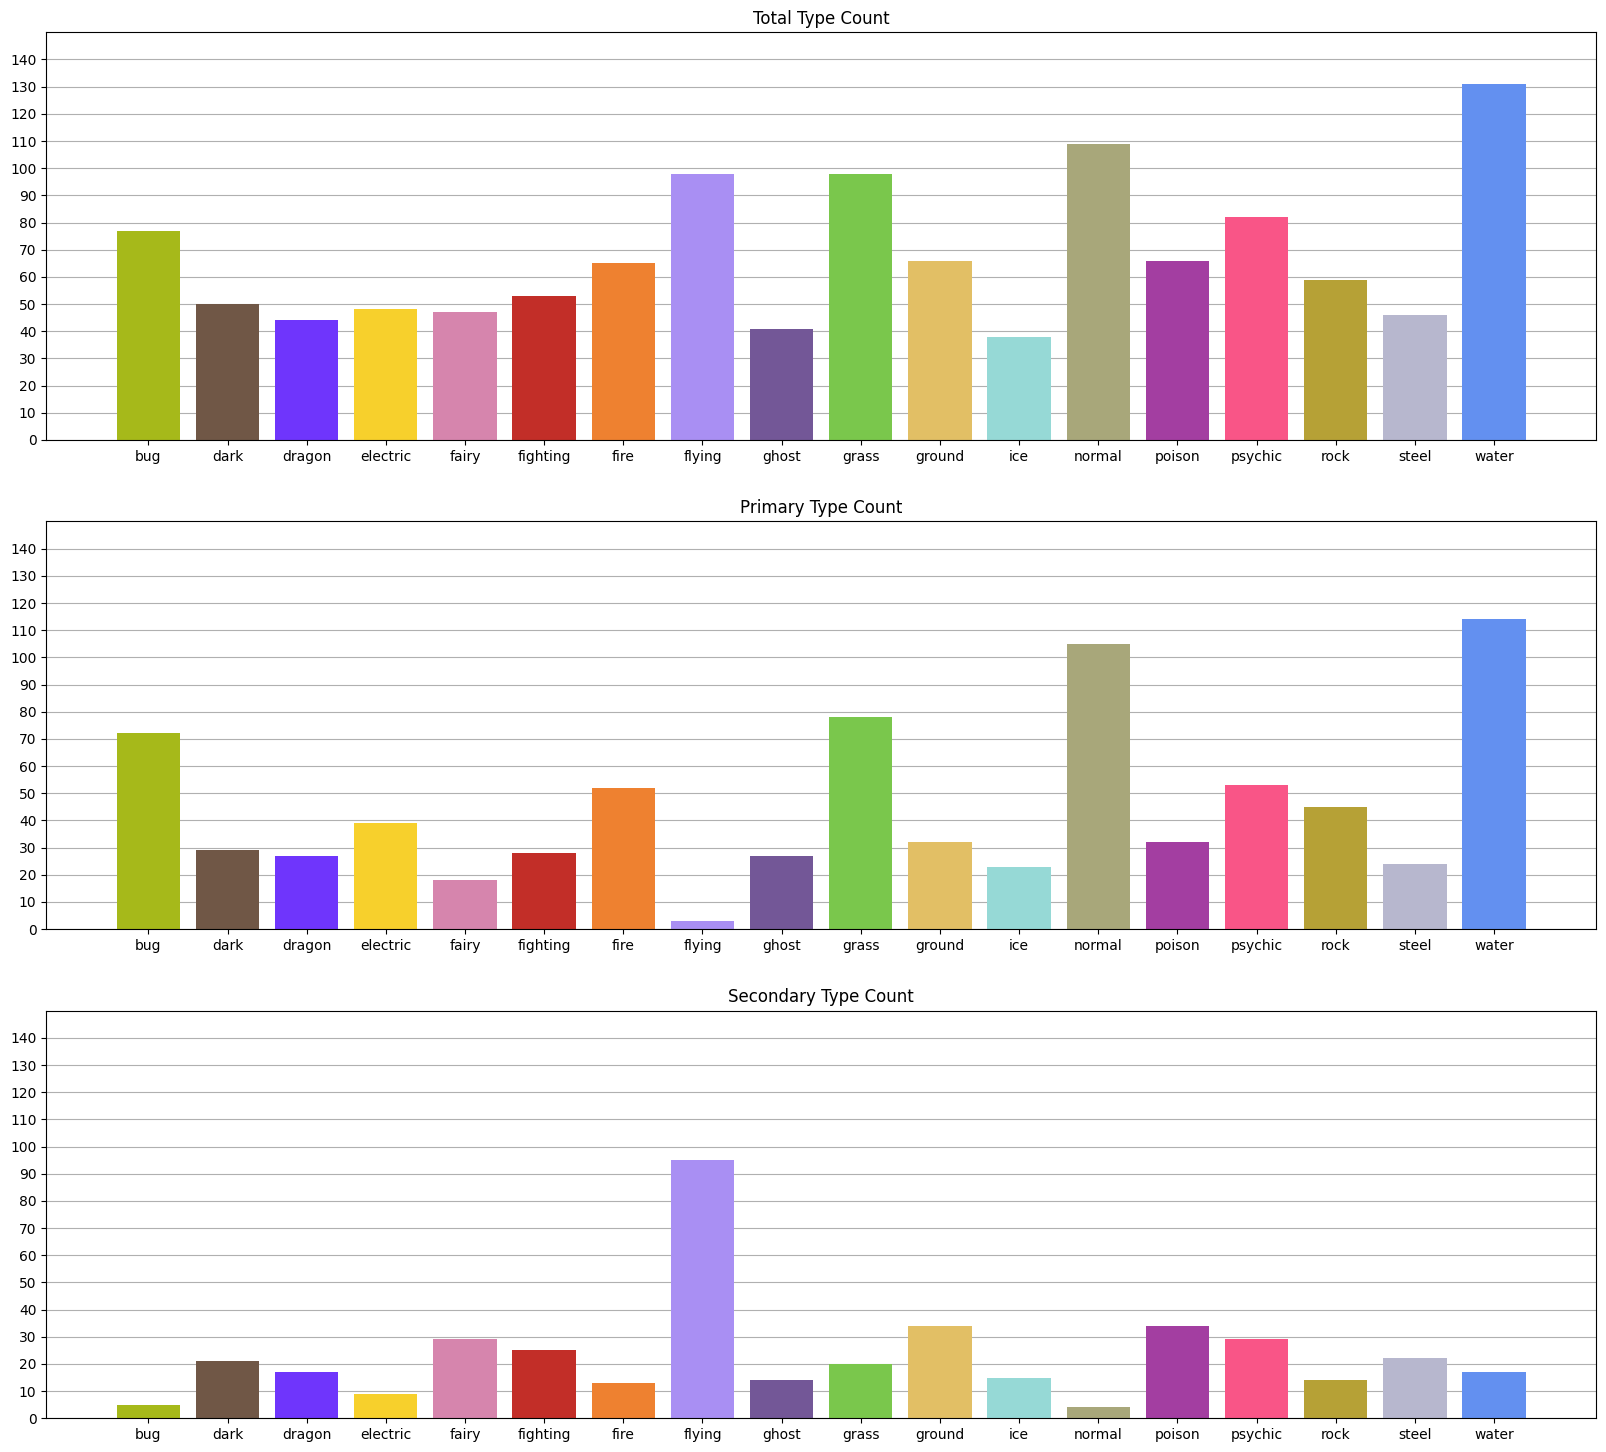

In [4]:
type1_counts = raw_dataframe["type1"].value_counts().to_dict()
type2_counts = raw_dataframe["type2"].value_counts().to_dict()
type_counts = {}

type1_counts = {key: value for key, value in sorted(type1_counts.items())}
type2_counts = {key: value for key, value in sorted(type2_counts.items())}

for key in type1_counts.keys():
    type_counts[key] = type1_counts[key] + type2_counts[key]

# Colours Assigned to each type within Pokemon to make the Graphs look nicer.
type_colours = ['#A6B91A', '#705746', '#6F35FC', '#F7D02C', '#D685AD', '#C22E28', '#EE8130', '#A98FF3', '#735797', '#7AC74C', '#E2BF65', '#96D9D6', '#A8A77A', '#A33EA1', '#F95587', '#B6A136', '#B7B7CE', '#6390F0']

plt.rcParams['figure.figsize'] = [20, 18]
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3)

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0,150])
    ax.set_yticks(range(0, 141, 10))
    ax.set_xticks(range(len(type_counts)), list(type_counts.keys()))
    ax.set_axisbelow(True)
    ax.grid(axis="y")


ax1.set_title("Total Type Count")
ax1.bar(range(len(type_counts)), list(type_counts.values()), color=type_colours)

ax2.set_title("Primary Type Count")
ax2.bar(range(len(type1_counts)), list(type1_counts.values()), color=type_colours)

ax3.set_title("Secondary Type Count")
ax3.bar(range(len(type2_counts)), list(type2_counts.values()), color=type_colours)




What do the average base stats look like for each type?

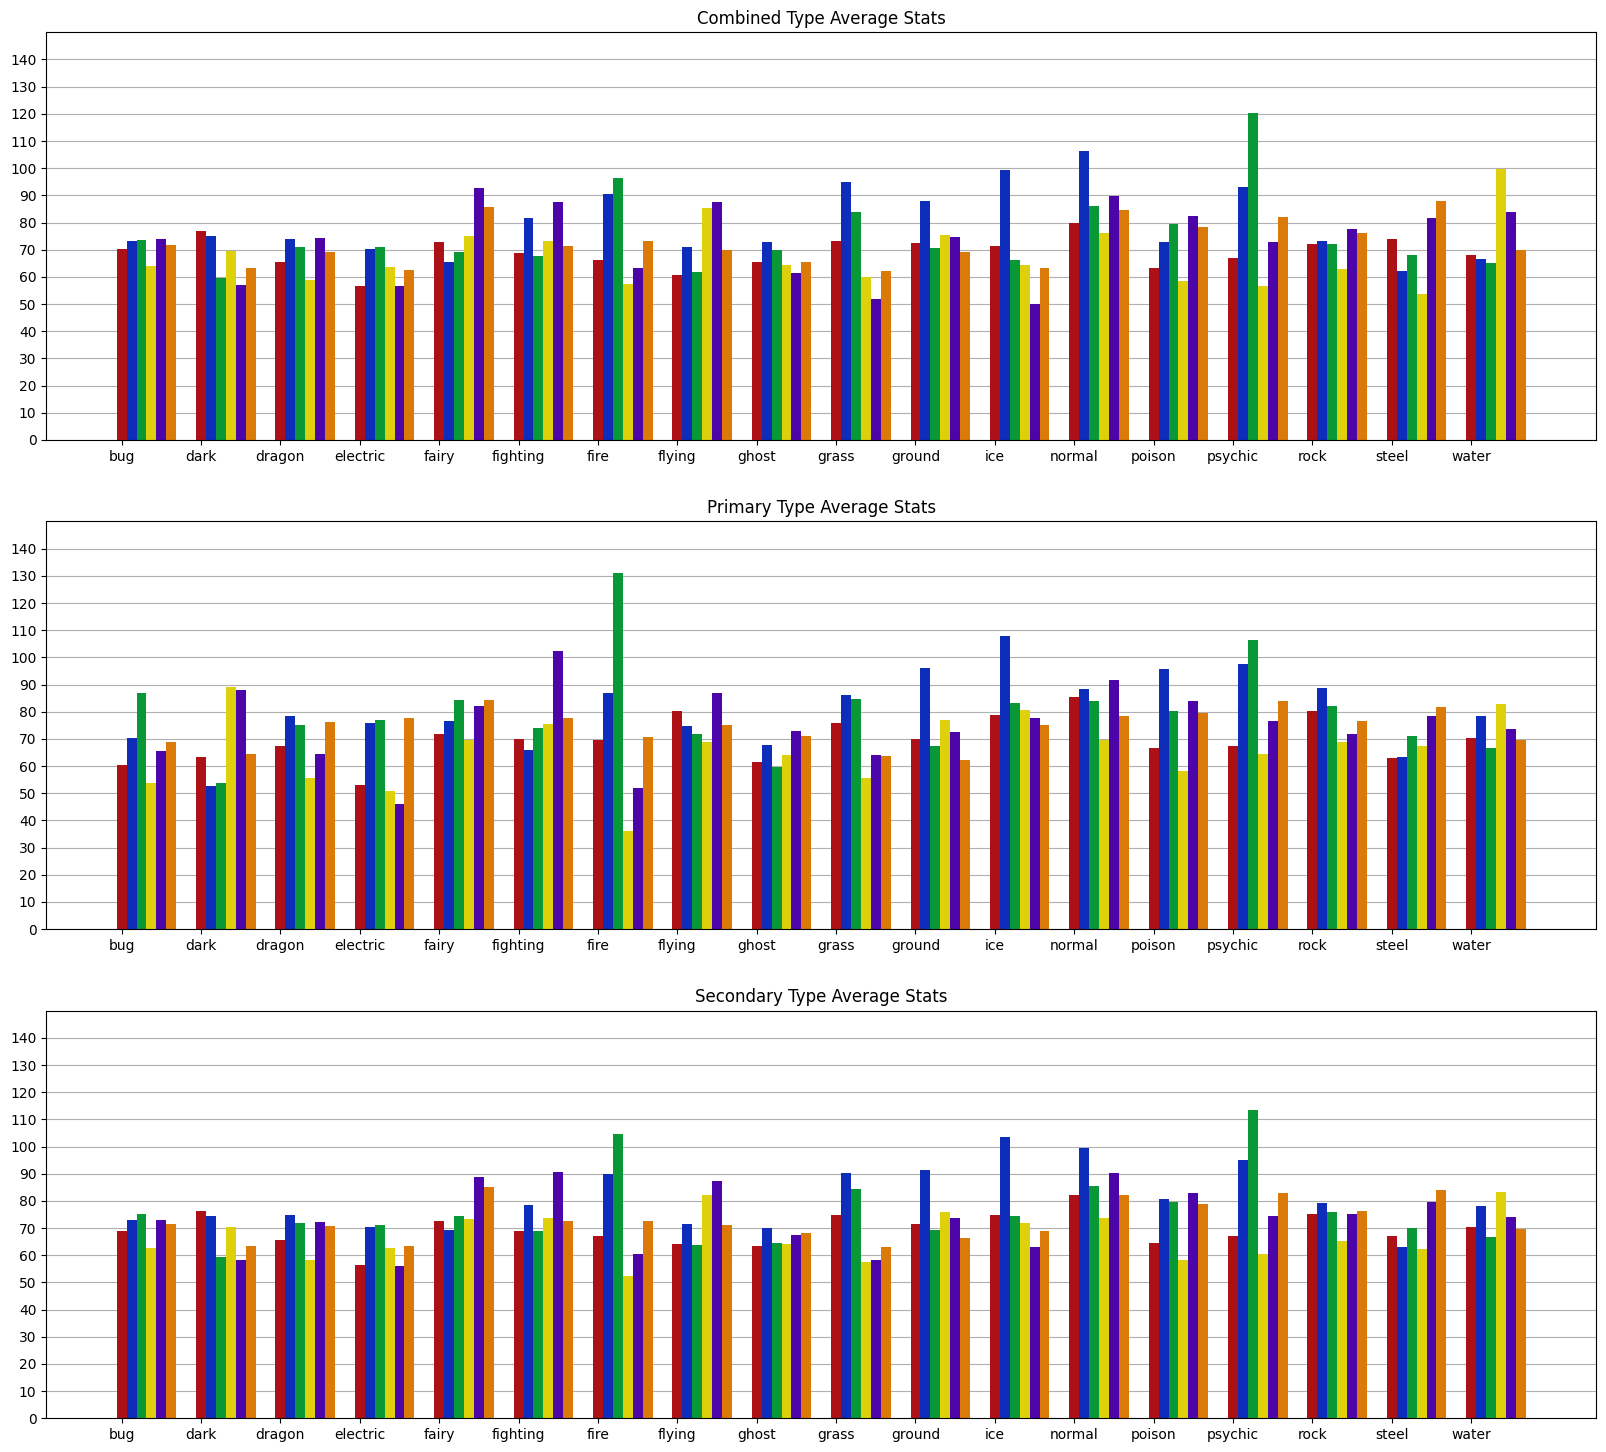

In [5]:
types = raw_dataframe["type1"].value_counts().to_dict().keys()

# Contained stats are hp, attack, defense, speed, sp_attack, sp_defense, total_count
type1_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}
type2_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}
combined_total_stats = {poke_type: [0,0,0,0,0,0,0] for poke_type in types}


stats = ["hp", "attack", "defense", "speed", "sp_attack", "sp_defense"]
stats_dataframe = raw_dataframe[["type1", "type2"] + stats]

for index, row in stats_dataframe.iterrows():
    type1 = row["type1"]
    type2 = row["type2"]

    stat_values = [row["hp"], row["attack"], row["defense"], row["speed"], row["sp_attack"], row["sp_defense"], 1]

    type1_total_stats[type1] = [x + y for x,y in zip(type1_total_stats[type1], stat_values)]
    combined_total_stats[type1] = [x + y for x,y in zip(combined_total_stats[type1], stat_values)]

    if type2 not in types: continue

    type2_total_stats[type2] = [x + y for x,y in zip(type2_total_stats[type2], stat_values)]
    combined_total_stats[type2] = [x + y for x,y in zip(combined_total_stats[type2], stat_values)]

type1_average_stats = {}
type2_average_stats = {}
combined_average_stats = {}

for poke_type in types:
    type1_average_stats[poke_type] = [round(stat_total / type1_total_stats[poke_type][6], 2) for stat_total in type1_total_stats[poke_type][:-1]]
    type2_average_stats[poke_type] = [round(stat_total / type2_total_stats[poke_type][6], 2) for stat_total in type2_total_stats[poke_type][:-1]]
    combined_average_stats[poke_type] = [round(stat_total / combined_total_stats[poke_type][6], 2) for stat_total in combined_total_stats[poke_type][:-1]]


plt.rcParams['figure.figsize'] = [20, 18]
fig, [ax1, ax2, ax3] = plt.subplots(ncols=1, nrows=3)
stats_colours = ['#ad1117', '#0d2dba', '#089936', '#ded00b', '#4c05a8', '#db7909']

for ax in [ax1, ax2, ax3]:
    ax.set_ylim([0,150])
    ax.set_yticks(range(0, 141, 10))
    ax.set_xticks(range(len(type_counts)), list(type_counts.keys()))
    ax.set_axisbelow(True)
    ax.grid(axis="y")

bar_width = 0.125

ax1.set_title("Combined Type Average Stats")
ax2.set_title("Primary Type Average Stats")
ax3.set_title("Secondary Type Average Stats")


offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [type1_average_stats[poke_type][i] for poke_type in types]
    ax1.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1

offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [type2_average_stats[poke_type][i] for poke_type in types]
    ax2.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1

offset_multipler = 0 
for i in range(len(stats)):
    spacing = [x + (bar_width * offset_multipler) for x in range(len(types))]
    values = [combined_average_stats[poke_type][i] for poke_type in types]
    ax3.bar(spacing, values, bar_width, color=stats_colours[i])
    offset_multipler += 1


[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210, 1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430, 1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540, 1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650, 1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760, 1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 185

<Figure size 6000x60000 with 0 Axes>

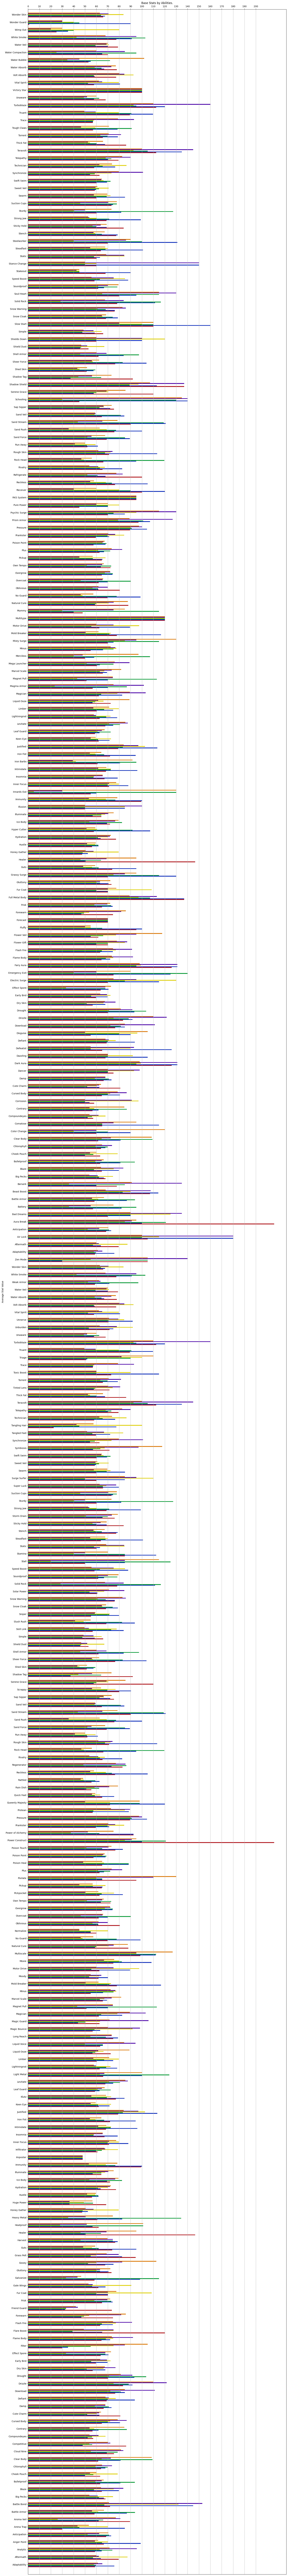

In [51]:
unique_abilites = set()

for index, row in raw_dataframe.iterrows():
    ability_string = raw_dataframe['abilities'][index]
    ability_string = ability_string.replace("[", "").replace("]", "").replace("'", "")
    ability_list = ability_string.split(",")

    unique_abilites = unique_abilites.union(ability_list)

unique_abilites = sorted(list(unique_abilites))

for i in range(len(unique_abilites)):
    unique_abilites[i] = unique_abilites[i].strip(" ")

ability_total_stats = {ability: [0,0,0,0,0,0,0] for ability in unique_abilites}

for index, row in raw_dataframe.iterrows():

    for ability in unique_abilites:

        if ability in row["abilities"]:
            stat_values = [row["hp"], row["attack"], row["defense"], row["speed"], row["sp_attack"], row["sp_defense"], 1]
            ability_total_stats[ability] = [x + y for x,y in zip(ability_total_stats[ability], stat_values)]

ability_average_stat = {}

for ability in unique_abilites:
    ability_average_stat[ability] = [round(stat_total / ability_total_stats[ability][6], 2) for stat_total in ability_total_stats[ability][:-1]]


plt.figure(figsize=(20,200), dpi=300)
fig, ax = plt.subplots()

bar_width = 1
offset_multipler = 10

ax.set_title("Base Stats by Abilities.")

ax.set_ylabel("Average Stat Value")
ax.set_ylim([0,3400])
ax.set_yticks(range(13, offset_multipler * len(unique_abilites) + 10, offset_multipler), unique_abilites)

ax.xaxis.tick_top()
ax.set_xticks(range(0, 201, 10))

ax.grid(axis="x")


for i in range(len(stats)):
    spacing = [(offset_multipler * x) + (bar_width * i) + offset_multipler for x in range(len(unique_abilites))]
    print(spacing)

    values = [ability_average_stat[ability][i] for ability in unique_abilites]

    ax.barh(spacing, values, bar_width, color=stats_colours[i])